# Critical Band Analysis

This experiment will compare 4 sets of EEG channels selections:
* C3, C4
* C5, C3, C1, C2, C4, C6, FC3, CP3, FC4, CP4
* FC5, FC3, FC2, C5, C3, C1, CP5, CP3, CP1, FC2, FC4, FC6, C2, C4, C6, CP2, CP4, CP6
* All EEG channels

In [1]:
bare_minimum_channels = ['C3', 'C4']
minimum_channels = ['C5', 'C3', 'C1', 'C2', 'C4', 'C6', 'FC3', 'CP3', 'FC4', 'CP4']

all_available_channels = ['FC5', 'FC3', 'FC2', 'C5', 'C3', 'C1', 'CP5', 'CP3', 'CP1', 'FC2', 'FC4', 'FC6', 'C2', 'C4',
                          'C6', 'CP2', 'CP4', 'CP6']

For 4 frequency bands:
* 8Hz-10Hz
* 10Hz-12Hz
* 20Hz-22Hz
* 22Hz-24Hz

In [2]:
bands = [(6, 8), (8, 10), (20, 22), (22, 24)]

## Load libraries

In [12]:
from experiments.band_classification import process_bands, visualize_multiple_configurations_band_accuracy, visualize_csp_filters

## Process Data

In [6]:
experiment_names = ['2 channels', '10 channels', '18 channels', '64 channels']
experiment_channel_selections = [
    process_bands(bands, bare_minimum_channels, True),
    process_bands(bands, minimum_channels, True),
    process_bands(bands, all_available_channels, True),
    process_bands(bands, reset=True)
]        

Started processing 6Hz - 8Hz band
Creating RawArray with float64 data, n_channels=64, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 6 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 6.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 5.50 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 8.50 Hz)
- Filter length: 1691 samples (3.303 sec)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20

    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.5 (2.2e-16 eps * 2 dim * 1.2e+16  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6 (2.2e-16 eps * 2 dim * 1.3e+16  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.6 (2.2e-16 eps * 2 dim * 1.3e+16  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EM

    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.5 (2.2e-16 eps * 2 dim * 1.2e+16  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.3 (2.2e-16 eps * 2 dim * 1.2e+16  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.4 (2.2e-16 eps * 2 dim * 1.2e+16  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing ra

Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.4 (2.2e-16 eps * 2 dim * 1.2e+16  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.2 (2.2e-16 eps * 2 dim * 1.4e+16  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.4 (2.2e-16 eps * 2 dim * 1.2e+16  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.4 (2.2e-16 eps

C:\Users\stz\.conda\envs\csp-comparison\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 57 (2.2e-16 eps * 10 dim * 2.6e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 47 (2.2e-16 eps * 10 dim * 2.1e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 55 (2.2e-16 eps * 10 dim * 2.5e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimati

C:\Users\stz\.conda\envs\csp-comparison\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 57 (2.2e-16 eps * 10 dim * 2.6e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 49 (2.2e-16 eps * 10 dim * 2.2e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 56 (2.2e-16 eps * 10 dim * 2.5e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimati

C:\Users\stz\.conda\envs\csp-comparison\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 58 (2.2e-16 eps * 10 dim * 2.6e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Finish processing 6Hz - 8Hz band
Started processing 8Hz - 10Hz band
Creating RawArray with float64 data, n_channels=64, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 8 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-


Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 2561 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 53 (2.2e-16 eps * 10 dim * 2.4e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 55 (2.2e-16 eps * 10 dim * 2.5e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 52 (2.2e-16 eps * 10 dim * 2.3e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reduc

C:\Users\stz\.conda\envs\csp-comparison\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 55 (2.2e-16 eps * 10 dim * 2.5e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 51 (2.2e-16 eps * 10 dim * 2.3e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 54 (2.2e-16 eps * 10 dim * 2.4e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimati

C:\Users\stz\.conda\envs\csp-comparison\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 54 (2.2e-16 eps * 10 dim * 2.5e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 51 (2.2e-16 eps * 10 dim * 2.3e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 53 (2.2e-16 eps * 10 dim * 2.4e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimati

C:\Users\stz\.conda\envs\csp-comparison\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 53 (2.2e-16 eps * 10 dim * 2.4e+16  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using EMPIRICAL
Done.


C:\Users\stz\.conda\envs\csp-comparison\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Finish processing 20Hz - 22Hz band
Started processing 22Hz - 24Hz band
Creating RawArray with float64 data, n_channels=64, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 22 - 24 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 22.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 21.50 Hz)
- Upper passband edge: 24.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 24.50 Hz)
- Filter length: 1691 samples (3.303 sec)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items act

C:\Users\stz\.conda\envs\csp-comparison\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Finish processing 22Hz - 24Hz band
Started processing 6Hz - 8Hz band
Creating RawArray with float64 data, n_channels=64, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 6 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 6.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 5.50 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 8.50 Hz)
- Filter length: 1691 samples (3.303 sec)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
U

C:\Users\stz\.conda\envs\csp-comparison\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Computing rank from data with rank=None
    Using tolerance 95 (2.2e-16 eps * 17 dim * 2.5e+16  max singular value)
    Estimated rank (mag): 17
    MAG: rank 17 computed from 17 data channels with 0 projectors
Reducing data rank from 17 -> 17
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e+02 (2.2e-16 eps * 17 dim * 3.2e+16  max singular value)
    Estimated rank (mag): 17
    MAG: rank 17 computed from 17 data channels with 0 projectors
Reducing data rank from 17 -> 17
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 98 (2.2e-16 eps * 17 dim * 2.6e+16  max singular value)
    Estimated rank (mag): 17
    MAG: rank 17 computed from 17 data channels with 0 projectors
Reducing data rank from 17 -> 17
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e+02 (2.2e-16 eps * 17 dim * 3.1e+16  max singular value)
    Estima

    Estimated rank (mag): 17
    MAG: rank 17 computed from 17 data channels with 0 projectors
Reducing data rank from 17 -> 17
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e+02 (2.2e-16 eps * 17 dim * 3.1e+16  max singular value)
    Estimated rank (mag): 17
    MAG: rank 17 computed from 17 data channels with 0 projectors
Reducing data rank from 17 -> 17
Estimating covariance using EMPIRICAL
Done.
Finish processing 8Hz - 10Hz band
Started processing 20Hz - 22Hz band
Creating RawArray with float64 data, n_channels=64, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 20 - 22 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Window

- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 24.50 Hz)
- Filter length: 1691 samples (3.303 sec)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 2561 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.1e+02 (2.2e-16 eps * 17 dim * 2.9e+16  max singular value)
    Estimated rank (mag): 17
    MAG: rank 17 computed from 17 data channels with 0 projectors
Reducing data rank from 17 -> 17
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e+02 (2.2e-16 eps * 17 dim * 3.1e+16  max singular value)
    Estimated rank (mag): 17
    MAG: rank 17 computed from 17 data channels with 0 projectors
Reducing data rank from 17 -> 17
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e+02 (2.2e-16 eps * 17 dim *

    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e+03 (2.2e-16 eps * 64 dim * 7.7e+16  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e+03 (2.2e-16 eps * 64 dim * 9.4e+16  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e+03 (2.2e-16 eps * 64 dim * 7.9e+16  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64

Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.7e+02 (2.2e-16 eps * 64 dim * 6.8e+16  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1e+03 (2.2e-16 eps * 64 dim * 7e+16  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.5e+02 (2.2e-16 eps * 64 dim * 6.7e+16  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Usin

Done.
Computing rank from data with rank=None
    Using tolerance 6.7e+02 (2.2e-16 eps * 64 dim * 4.7e+16  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.7e+02 (2.2e-16 eps * 64 dim * 4.7e+16  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.8e+02 (2.2e-16 eps * 64 dim * 4.8e+16  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.7e+02 (2.2e-16 eps * 64 dim * 4.7e+16  max singular v

    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.9e+02 (2.2e-16 eps * 64 dim * 4.1e+16  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.1e+02 (2.2e-16 eps * 64 dim * 4.3e+16  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.2e+02 (2.2e-16 eps * 64 dim * 4.4e+16  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64

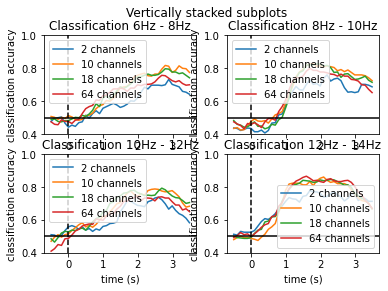

In [9]:
visualize_multiple_configurations_band_accuracy(experiment_channel_selections, experiment_names, (2, 2))

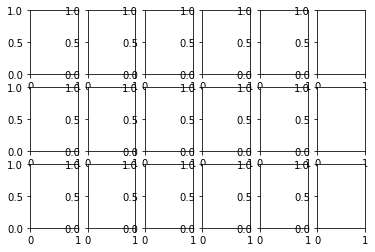

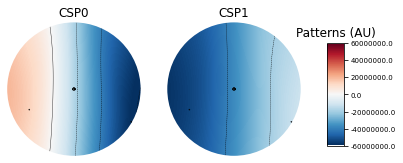

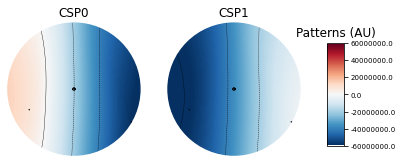

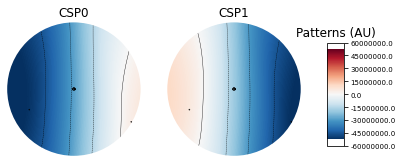

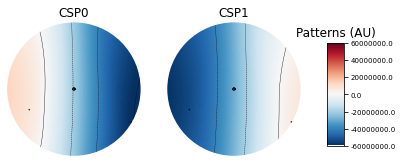

IndexError: list index out of range

In [14]:
for index, experiment_name in enumerate(experiment_names):
    visualize_csp_filters(experiment_channel_selections[index], 2, (2,2))